## GMM PreProc

In [3]:
# load package and create path for project
import sys, os

pathArr = os.getcwd().split("/")
scriptPath = '/'.join(map(str, pathArr[:len(pathArr)-1]))
sys.path.append(scriptPath)

# import submit module from our tools subfolder
from tools import submit, getdata, save4later

In [9]:
%matplotlib inline
from sklearn.mixture import GMM
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load data
_loaded = getdata.load_data(0, test=True, nonas=True)

FEATURES = _loaded['features']
print 'Number of features:', len(FEATURES)

# load and scale pixel values to [0, 1]
train_data = _loaded['training']['data']

# load and scale target coordinates to [-1, 1]
train_labels = _loaded['training']['labels']
    
print 'Training dataset size: ', train_data.shape

test_data = _loaded['test']['data']

print 'Test dataset size: ', test_data.shape

Number of features: 30
Training dataset size:  (2140,)
Test dataset size:  (1783,)


(-0.5, 95.5, 95.5, -0.5)

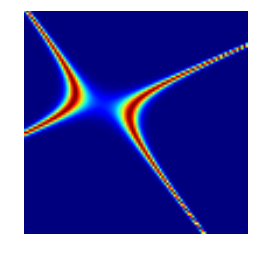

In [16]:
# same for the nose
clf_n = GMM(n_components = 2, covariance_type = 'full')

train_labels_nose_tip = [(train_labels[20][i], train_labels[21][i]) for i in range(len(train_labels[0]))]

# fit if these in the images
clf_n.fit(train_labels_nose_tip)

prob_matrix = np.zeros((96,96),dtype=np.float)
for i in range(96):
    for j in range(96):
        prob_matrix[i,j] = reduce(lambda x,y: x*y, clf_n.predict_proba([i,j])[0] )

plt.imshow(prob_matrix)
plt.axis('off')

(-0.5, 95.5, 95.5, -0.5)

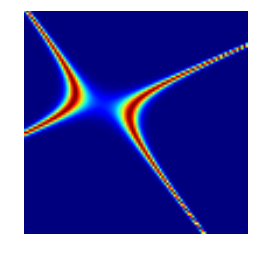

In [13]:
# same for the nose
clf_n = GMM(n_components = 2, covariance_type = 'full')

train_labels_nose_tip = [(train_labels[20][i], train_labels[21][i]) for i in range(len(train_labels[0]))]

# fit if these in the images
clf_n.fit(train_labels_nose_tip)


prob_matrix = np.zeros((96,96),dtype=np.float)
for i in range(96):
    for j in range(96):
        prob_matrix[i,j] = reduce(lambda x,y: x*y, clf_n.predict_proba([i,j])[0] )

plt.imshow(prob_matrix)
plt.axis('off')